In [67]:
import pandas as pd
import seaborn as sns


#### Загрузить файл в pandas dataframe (5 б.)

In [16]:
data_frame = pd.read_csv('HR.csv', encoding = 'utf8')

data_frame['counter'] = 1
data_frame['counter'] = data_frame['counter'].cumsum()
data_frame.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,counter
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,3
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,5


#### Расчитать основные статистики для переменных (10 б.)

In [6]:
data_frame.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Расчитайте и визуализируйте коррелляционную матрицу (10 б.)

In [70]:
# sns.pairplot(data_frame)

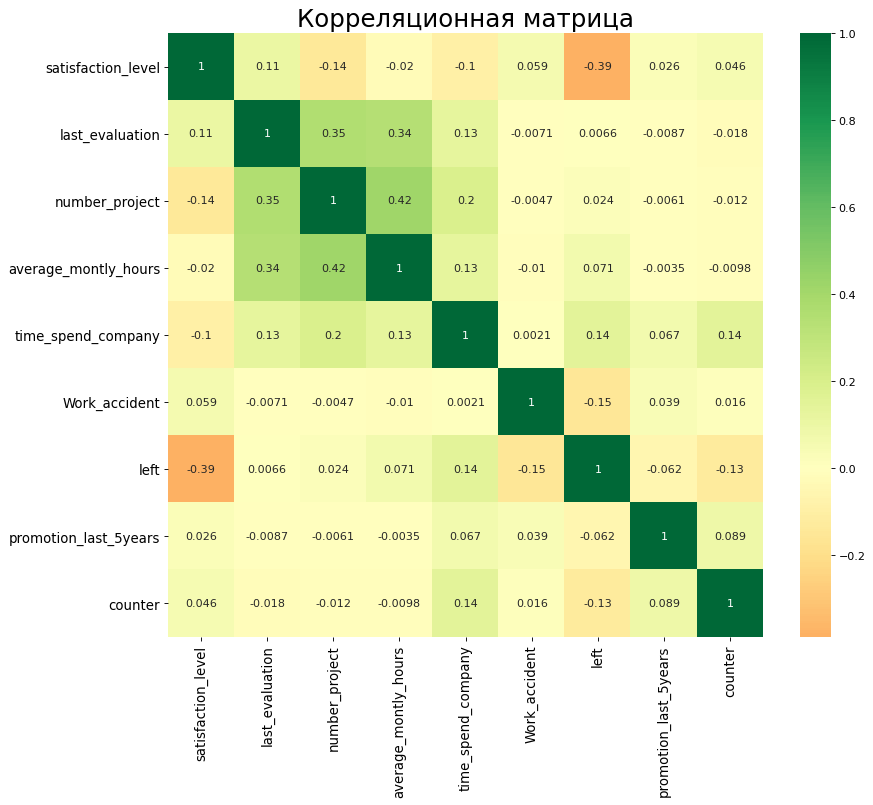

In [73]:
from matplotlib import pyplot as plt


plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_frame.corr(), xticklabels=data_frame.corr().columns, yticklabels=data_frame.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляционная матрица', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

print('Наиболее заивисмые переменные это Кол-во проектов и Кол-часов в месяц')
print('Наименее заивисмые переменные это Флаг уволившися и Уроввень удовлетворенности ')


#### Рассчитайте сколько сотрудников работает в каждом департаменте. (5 б.)

In [27]:
data_frame.groupby(by = 'department').count().reset_index()[['department','counter']]

,department,counter
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


#### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности (5 б.)

In [25]:
data_frame.groupby( by =['department','salary']).count().reset_index()[['department','salary','counter']].head()

,department,salary,counter
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


#### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом (10 б.)

In [39]:
data_frame[data_frame['salary'].isin(['high','low'])].groupby(by='salary').mean().reset_index()[['salary','average_montly_hours']]

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583


####  Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности) (10 б.):
    ●Доля сотрудников с повышением за последние 5 лет
    ●Средняя степень удовлетворенности
    ●Среднее количество проектов

##### Доля сотрудников с повышением за последние 5 лет

In [65]:
data_frame[data_frame['left']==0].counter.count()
sat = data_frame[data_frame['left']==0].groupby(by = 'promotion_last_5years').count().reset_index()[['promotion_last_5years','counter']]
sat['total_empl'] =data_frame[data_frame['left']==0].counter.count()
sat['share'] =sat['counter']/sat['total_empl']*100
print(sat)

data_frame[data_frame['left']==1].counter.count()
sat2 = data_frame[data_frame['left']==1].groupby(by = 'promotion_last_5years').count().reset_index()[['promotion_last_5years','counter']]
sat2['total_empl'] =data_frame[data_frame['left']==1].counter.count()
sat2['share'] =sat2['counter']/sat2['total_empl']*100
print(sat2)




   promotion_last_5years  counter  total_empl      share
0                      0    11128       11428  97.374869
1                      1      300       11428   2.625131
   promotion_last_5years  counter  total_empl      share
0                      0     3552        3571  99.467936
1                      1       19        3571   0.532064


##### Средняя степень удовлетворенности

In [60]:
a = data_frame[data_frame['left']==0].satisfaction_level.mean()*100
b = data_frame[data_frame['left']==1].satisfaction_level.mean()*100

print(f'Средний уровень удовлетворенности у не уволившихся сотрудников {round(a,2)}%')
print(f'Средний уровень удовлетворенности у уволившихся сотрудников {round(b,2)}%')


Средний уровень удовлетворенности у не уволившихся сотрудников 66.68%
Средний уровень удовлетворенности у уволившихся сотрудников 44.01%


##### Среднее количество проектов

In [63]:
a = data_frame[data_frame['left']==0].number_project.mean()
b = data_frame[data_frame['left']==1].number_project.mean()

print(f'Среднее кол-во проектов у не уволившихся сотрудников {round(a,2)}')
print(f'Среднее кол-во проектов у уволившихся сотрудников {round(b,2)}')


Среднее кол-во проектов у не уволившихся сотрудников 3.79
Среднее кол-во проектов у уволившихся сотрудников 3.86
